# An exploration of factors that may impact obesity in America

To fully explore what may have an impact on obesity, we need to bring in data from numerous sources. The more data we have to chracterize aspects of a community (as it relates to both food,demographics, and economy), the better we can deduce on what is truly linked to obesity (major indicators and factors). 

Sources:
1. Feeding America
2. The Food Atlas
3. American Census Survey
4. Census Bureau 

We also need to have numerous categorical values that will help us not only visualize trends but also test for significance in those trends. Thus, we must use the data that we have to crate numerous categories

## Setting up our dataframe

To utilize all of this data (and see how they affect eachother), we must have them be within the same dataframe. To do this, we must merge all of our data. Because all of our data is per county, we can marge on county code. Then we must clean it up, explore to ensure everything is in place, and ensure all the names make sense.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# displays all of our columns
pd.options.display.max_columns = 100

In [3]:
# reading in and tidying data
obesity_df = pd.read_csv("../../processed_data/updated_obesity_data.csv")
obesity_df = obesity_df.drop(columns = ["grocery", "supercenters", "convenience_stores", "speciality_stores", "food_stamp_stores", "number_fast_foods", "full_service_count", "farmers_markets", "food_banks_18_x", "food_stamp_fm", "total_fi_people", "num_fi_children"])

In [4]:
#reading in and cleaning obesity data 
obesity_df = pd.read_csv("../../processed_data/Obesity_clean.csv")
obesity_df = obesity_df.drop(columns = "State")
obesity_df.columns = ["county", "fips", "obesity_rate"]

# reading in farmers market data
fm_df = pd.read_csv("../../processed_data/farmers_markets.csv")

# reading in food insecurity data
fi_df = pd.read_csv("../../processed_data/fi_data.csv")

# reading in and cleaning up food assitance data frame
assistance_df = pd.read_csv("../../processed_data/Assistance dataset_update2_clean.csv",encoding='latin-1' )
assistance_df = assistance_df.drop(columns = ["snap_auth_stores_chg_12_17", "snap_bens_per_cap_chg_12_17", "school_lunch_prog_chg_12_17", "school_bfast_prog_chg_12_17", "smr_food_prog_12_17", "wic_parts_pop_12_17"])

# reading in population dataset (note, this is an estimate of the 2017 population for each county)
pop_df = pd.read_csv("../../processed_data/new_population3 (1).csv")
pop_df.columns = ["fips", "population"]

# reading in and cleaning up restaurant dataset
restaurant_df = pd.read_csv("../../processed_data/restaurants_clean.csv")
restaurant_df = restaurant_df.drop(columns = ["fast_food_exp_percap_12", "full_service_exp_percap_12", "Unnamed: 0"])

# reading in and cleaning store access data
store_access = pd.read_csv("../../processed_data/store_access_clean.csv")
store_access = store_access.drop(columns = "Unnamed: 0")

# reading in and cleaning store access data
store_types = pd.read_csv("../../processed_data/store_clean.csv")
store_types = store_types.drop(columns = "Unnamed: 0")

# reading demographic data set
demography = pd.read_csv("../../processed_data/demographic_data_2017.csv")

# reading in income data
median_income = pd.read_csv("../../processed_data/median_income_2017.csv")

In [5]:
# merging all of our datsets on the fips code (which is the id of a county)
merged_df = pd.merge(store_access, store_types, how = 'left', on = 'fips')
merged_df = pd.merge(merged_df, obesity_df, how = 'left', on = 'fips')
merged_df = pd.merge(merged_df, fm_df, how = 'left', on = 'fips')
merged_df = pd.merge(merged_df, fi_df, how = 'left', on = 'fips')
merged_df = pd.merge(merged_df, assistance_df, how = 'left', on = 'fips')
merged_df = pd.merge(merged_df, pop_df, how = 'left', on = 'fips')
merged_df = pd.merge(merged_df, restaurant_df, how = 'left', on = 'fips')
merged_df = pd.merge(merged_df, demography, how = 'left', on = 'fips')
merged_df = pd.merge(merged_df, median_income, how = 'left', on = 'fips')

# dropped columns that had only number of (variable). Kept the concentration
merged_df = merged_df.drop(columns = ["state_y", "region_y", "county_y", "pop_low_access_15","low_income_low_access_15", "no_car_low_access_15", "snap_low_access_15", "child_low_access_15", "senior_low_access_15", "white_low_access_15", "black_low_access_15", "hispanic_low_access_15", "asian_low_access_15", "nhna_low_access_15", "multiracial_low_access_15", "grocery_16", "super_16", "convenience_16", "specialty_16", "snap_available_17", "wic_available_16", "farmers_markets", "fm_accepts_snap", "fm_accept_wic", "fm_accept_credit", "total_fi_people", "num_fi_children", "snap_auth_stores_17", "food_banks_18", "population", "fast_food_16", "full_service_16"])

# renamed columns
merged_df.columns = ['fips', 'state', 'county', 'percent_pop_low_access_15',
       'percent_low_income_low_access_15', 'percent_no_car_low_access_15',
       'percent_snap_low_access_15', 'percent_child_low_access_15',
       'percent_senior_low_access_15', 'percent_white_low_access_15',
       'percent_black_low_access_15', 'percent_hispanic_low_access_15',
       'percent_asian_low_access_15', 'percent_nhna_low_access_15',
       'nhpi_low_access_15', 'percent_nhpi_low_access_15',
       'percent_multiracial_low_access_15', 'grocery_per1000',
       'super_per1000', 'convenience_per1000', 'specialty_per1000',
       'snap_available_per1000', 'wic_available_per1000', 'county_x',
       'obesity_rate', 'state_x', 'farmers_markets_per1000',
       'pct_fm_accepting_snap', 'pct_fm_accept_wic', 'pct_fm_credit',
       'fm_sell_frveg', 'pct_fm_sell_frveg', 'region', 'fi_rate',
       'child_fi_rate', 'cost_per_meal', 'est_annual_food_budget_shortfall',
       'state_x', 'county_x', 'snap_bens_per1000', 'school_lunch_prog_17',
       'school_bfast_prog_17', 'smr_food_prog_17', 'wic_parts_pop_17',
       'fast_food_per1000', 'full_service_per1000', 'pop_estimate',
       'percent_white', 'percent_black', 'percent_native_american',
       'percent_asian', 'percent_nhpi', 'percent_multi',
       'percent_nonwhite_hispanic', 'median_household_income']

# dropped more renames
merged_df = merged_df.drop(columns = ["state_x", "county_x"])

In [6]:
merged_df

,fips,state,county,percent_pop_low_access_15,percent_low_income_low_access_15,percent_no_car_low_access_15,percent_snap_low_access_15,percent_child_low_access_15,percent_senior_low_access_15,percent_white_low_access_15,percent_black_low_access_15,percent_hispanic_low_access_15,percent_asian_low_access_15,percent_nhna_low_access_15,nhpi_low_access_15,percent_nhpi_low_access_15,percent_multiracial_low_access_15,grocery_per1000,super_per1000,convenience_per1000,specialty_per1000,snap_available_per1000,wic_available_per1000,obesity_rate,farmers_markets_per1000,pct_fm_accepting_snap,pct_fm_accept_wic,pct_fm_credit,fm_sell_frveg,pct_fm_sell_frveg,region,fi_rate,child_fi_rate,cost_per_meal,est_annual_food_budget_shortfall,snap_bens_per1000,school_lunch_prog_17,school_bfast_prog_17,smr_food_prog_17,wic_parts_pop_17,fast_food_per1000,full_service_per1000,pop_estimate,percent_white,percent_black,percent_native_american,percent_asian,percent_nhpi,percent_multi,percent_nonwhite_hispanic,median_household_income
0,1001,AL,Autauga,0.32,0.12,0.03,0.05,0.08,0.04,0.23,0.08,0.01,0.0,0.0,8.817961,0.0,0.01,0.054271,0.018090,0.560802,0.018090,0.804747,0.090511,30.9,0.017985,0.000000,0.0,0.000000,1.0,100.0,S,13.2,19.8,3.19,3957000.0,16.354677,63.126590,33.475354,6.369006,2.543570,0.795977,0.560802,55036,75.4,19.1,0.3,0.9,0.1,0.4,2.7,58343.0
1,1003,AL,Baldwin,0.17,0.05,0.02,0.01,0.04,0.03,0.14,0.02,0.01,0.0,0.0,14.819634,0.0,0.01,0.139753,0.033733,0.568650,0.130115,0.890836,0.134802,26.7,0.018347,0.000000,0.0,50.000000,3.0,75.0,S,11.6,18.9,3.57,14361000.0,11.479360,63.126590,33.475354,6.369006,2.543570,0.751775,1.137300,203360,83.1,9.5,0.8,0.7,0.0,0.4,4.4,56607.0
2,1005,AL,Barbour,0.22,0.11,0.04,0.04,0.04,0.03,0.10,0.10,0.02,0.0,0.0,8.082376,0.0,0.02,0.155195,0.038799,0.737177,0.077598,1.424614,0.232387,40.8,0.160765,50.000000,0.0,50.000000,2.0,50.0,S,22.0,27.6,3.09,3035000.0,29.122147,63.126590,33.475354,6.369006,2.543570,0.892372,0.543183,26201,45.7,48.0,0.2,0.6,0.0,0.3,4.2,32490.0
3,1007,AL,Bibb,0.04,0.03,0.03,0.01,0.01,0.01,0.02,0.02,0.00,0.0,0.0,0.000000,0.0,0.00,0.220916,0.044183,0.662749,0.000000,0.801423,0.221474,40.1,0.044643,0.000000,0.0,0.000000,0.0,0.0,S,14.3,22.1,3.05,1684000.0,17.557791,63.126590,33.475354,6.369006,2.543570,0.309283,0.309283,22580,74.6,22.1,0.4,0.0,0.0,0.5,2.4,45795.0
4,1009,AL,Blount,0.06,0.03,0.03,0.01,0.02,0.01,0.06,0.00,0.01,0.0,0.0,1.062851,0.0,0.00,0.086863,0.017373,0.469059,0.000000,0.692374,0.139089,32.4,0.017289,0.000000,100.0,0.000000,1.0,100.0,S,10.7,21.2,3.10,3249000.0,12.377973,63.126590,33.475354,6.369006,2.543570,0.399569,0.208471,57667,87.4,1.6,0.4,0.1,0.0,0.4,9.0,48253.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,56037,WY,Sweetwater,0.43,0.11,0.02,0.02,0.11,0.04,0.38,0.00,0.06,0.0,0.0,27.720443,0.0,0.04,0.090406,0.022601,0.497231,0.022601,0.625948,0.090344,29.2,0.046457,0.000000,0.0,0.000000,0.0,0.0,W,10.7,17.0,3.14,2542000.0,5.694783,49.458965,15.566447,4.578746,1.753551,0.700644,0.723246,44527,79.6,0.8,1.0,0.6,0.5,0.6,16.0,75590.0
3146,56039,WY,Teton,0.29,0.07,0.01,0.01,0.05,0.03,0.27,0.00,0.03,0.0,0.0,8.468847,0.0,0.02,0.474547,0.000000,0.819672,0.345125,0.343864,0.129528,12.5,0.129977,33.333332,0.0,66.666664,3.0,100.0,W,9.7,11.7,4.20,1592000.0,0.436994,49.458965,15.566447,4.578746,1.753551,0.862813,2.545298,22923,81.5,0.6,0.4,2.2,0.0,0.6,15.0,90145.0
3147,56041,WY,Uinta,0.22,0.10,0.03,0.02,0.07,0.02,0.20,0.00,0.03,0.0,0.0,6.586104,0.0,0.02,0.096567,0.048284,0.627686,0.096567,0.744084,0.144991,29.6,0.098527,0.000000,0.0,100.000000,0.0,0.0,W,12.8,18.9,2.95,1340000.0,8.465480,49.458965,15.566447,4.578746,1.753551,0.820820,0.917387,20758,87.7,0.1,1.0,0.1,0.0,0.9,9.1,67404.0
3148,56043,WY,Washakie,0.11,0.04,0.01,0.01,0.02,0.03,0.10,0.00,0.00,0.0,0.0,0.000000,0.0,0.00,0.244260,0.000000,0.366390,0.000000,0.754382,0.244858,24.7,0.253646,0.0

In [7]:
# dropping duplicates 
    
#merged_df.drop_duplicates('fips')

In [8]:
merged_df

,fips,state,county,percent_pop_low_access_15,percent_low_income_low_access_15,percent_no_car_low_access_15,percent_snap_low_access_15,percent_child_low_access_15,percent_senior_low_access_15,percent_white_low_access_15,percent_black_low_access_15,percent_hispanic_low_access_15,percent_asian_low_access_15,percent_nhna_low_access_15,nhpi_low_access_15,percent_nhpi_low_access_15,percent_multiracial_low_access_15,grocery_per1000,super_per1000,convenience_per1000,specialty_per1000,snap_available_per1000,wic_available_per1000,obesity_rate,farmers_markets_per1000,pct_fm_accepting_snap,pct_fm_accept_wic,pct_fm_credit,fm_sell_frveg,pct_fm_sell_frveg,region,fi_rate,child_fi_rate,cost_per_meal,est_annual_food_budget_shortfall,snap_bens_per1000,school_lunch_prog_17,school_bfast_prog_17,smr_food_prog_17,wic_parts_pop_17,fast_food_per1000,full_service_per1000,pop_estimate,percent_white,percent_black,percent_native_american,percent_asian,percent_nhpi,percent_multi,percent_nonwhite_hispanic,median_household_income
0,1001,AL,Autauga,0.32,0.12,0.03,0.05,0.08,0.04,0.23,0.08,0.01,0.0,0.0,8.817961,0.0,0.01,0.054271,0.018090,0.560802,0.018090,0.804747,0.090511,30.9,0.017985,0.000000,0.0,0.000000,1.0,100.0,S,13.2,19.8,3.19,3957000.0,16.354677,63.126590,33.475354,6.369006,2.543570,0.795977,0.560802,55036,75.4,19.1,0.3,0.9,0.1,0.4,2.7,58343.0
1,1003,AL,Baldwin,0.17,0.05,0.02,0.01,0.04,0.03,0.14,0.02,0.01,0.0,0.0,14.819634,0.0,0.01,0.139753,0.033733,0.568650,0.130115,0.890836,0.134802,26.7,0.018347,0.000000,0.0,50.000000,3.0,75.0,S,11.6,18.9,3.57,14361000.0,11.479360,63.126590,33.475354,6.369006,2.543570,0.751775,1.137300,203360,83.1,9.5,0.8,0.7,0.0,0.4,4.4,56607.0
2,1005,AL,Barbour,0.22,0.11,0.04,0.04,0.04,0.03,0.10,0.10,0.02,0.0,0.0,8.082376,0.0,0.02,0.155195,0.038799,0.737177,0.077598,1.424614,0.232387,40.8,0.160765,50.000000,0.0,50.000000,2.0,50.0,S,22.0,27.6,3.09,3035000.0,29.122147,63.126590,33.475354,6.369006,2.543570,0.892372,0.543183,26201,45.7,48.0,0.2,0.6,0.0,0.3,4.2,32490.0
3,1007,AL,Bibb,0.04,0.03,0.03,0.01,0.01,0.01,0.02,0.02,0.00,0.0,0.0,0.000000,0.0,0.00,0.220916,0.044183,0.662749,0.000000,0.801423,0.221474,40.1,0.044643,0.000000,0.0,0.000000,0.0,0.0,S,14.3,22.1,3.05,1684000.0,17.557791,63.126590,33.475354,6.369006,2.543570,0.309283,0.309283,22580,74.6,22.1,0.4,0.0,0.0,0.5,2.4,45795.0
4,1009,AL,Blount,0.06,0.03,0.03,0.01,0.02,0.01,0.06,0.00,0.01,0.0,0.0,1.062851,0.0,0.00,0.086863,0.017373,0.469059,0.000000,0.692374,0.139089,32.4,0.017289,0.000000,100.0,0.000000,1.0,100.0,S,10.7,21.2,3.10,3249000.0,12.377973,63.126590,33.475354,6.369006,2.543570,0.399569,0.208471,57667,87.4,1.6,0.4,0.1,0.0,0.4,9.0,48253.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,56037,WY,Sweetwater,0.43,0.11,0.02,0.02,0.11,0.04,0.38,0.00,0.06,0.0,0.0,27.720443,0.0,0.04,0.090406,0.022601,0.497231,0.022601,0.625948,0.090344,29.2,0.046457,0.000000,0.0,0.000000,0.0,0.0,W,10.7,17.0,3.14,2542000.0,5.694783,49.458965,15.566447,4.578746,1.753551,0.700644,0.723246,44527,79.6,0.8,1.0,0.6,0.5,0.6,16.0,75590.0
3146,56039,WY,Teton,0.29,0.07,0.01,0.01,0.05,0.03,0.27,0.00,0.03,0.0,0.0,8.468847,0.0,0.02,0.474547,0.000000,0.819672,0.345125,0.343864,0.129528,12.5,0.129977,33.333332,0.0,66.666664,3.0,100.0,W,9.7,11.7,4.20,1592000.0,0.436994,49.458965,15.566447,4.578746,1.753551,0.862813,2.545298,22923,81.5,0.6,0.4,2.2,0.0,0.6,15.0,90145.0
3147,56041,WY,Uinta,0.22,0.10,0.03,0.02,0.07,0.02,0.20,0.00,0.03,0.0,0.0,6.586104,0.0,0.02,0.096567,0.048284,0.627686,0.096567,0.744084,0.144991,29.6,0.098527,0.000000,0.0,100.000000,0.0,0.0,W,12.8,18.9,2.95,1340000.0,8.465480,49.458965,15.566447,4.578746,1.753551,0.820820,0.917387,20758,87.7,0.1,1.0,0.1,0.0,0.9,9.1,67404.0
3148,56043,WY,Washakie,0.11,0.04,0.01,0.01,0.02,0.03,0.10,0.00,0.00,0.0,0.0,0.000000,0.0,0.00,0.244260,0.000000,0.366390,0.000000,0.754382,0.244858,24.7,0.253646,0.0

## Creating our categoriy columns

We wanted to create 

1. Obesity categorical value
    - This would label counties as having either high, medium, or low rate of obesity. 
    - high: over 30%
    - medium: was between 15% and 30%
    - low: under 15%
 
2. Income bracket categorial values
    - This would label counties as having high, medium, or low incomes based on the counties median income.
    - low_income: under &#36;32,500
    - lower_middle_class: \\$32,501 to \\$54,500 
    - mid_class:  \\$54,501 to \\$108,500
    - highest_income: &#36;108,500 and up
    
3. A categorical variable that would describe what level of access to healthy food every county had
    - We used supercenter concentration, grocery store concentration, full service restaurant concentration, and food market concentration as indicators for access to healthy food considering those places have a high variety of food available. 
        -Concentration is defined as number per 1000 people
    - We gave a score from 1-3 based on concentration of each establishment type listed up. We then added all those scores together. Based on that total score, we determined what level of access to healthy food each county had. 
    - low: 4-6
    - medium: 7-9
    - high: 10-12

In [9]:
# Making our obesity categorical value 
conditions = [(merged_df["obesity_rate"] < 15), 
              (merged_df["obesity_rate"] >= 15) & (merged_df["obesity_rate"] < 30),
              (merged_df["obesity_rate"] >= 30)]

values = ["low", "med", "high"]

merged_df["obesity_category"] = np.select(conditions, values)

In [10]:
# Making our income categorical variable 
conditions2 = [(merged_df["median_household_income"] < 32500), 
              (merged_df["median_household_income"] >= 32500) & (merged_df["median_household_income"] < 54500),
              (merged_df["median_household_income"] >= 54500) & (merged_df["median_household_income"] < 108500),
              (merged_df["median_household_income"] >= 108500)]
values2 = ["low_income", "lower_mid_class", "mid_class", "highest_income"]

merged_df["class_category"] = np.select(conditions2, values2)

In [11]:
# Making Grocery access
low_groc = merged_df["grocery_per1000"].quantile(.33)
high_groc = merged_df["grocery_per1000"].quantile(.66)

conditions2 = [(merged_df["grocery_per1000"] <= low_groc), 
              (merged_df["grocery_per1000"] > low_groc) & (merged_df["grocery_per1000"] <= high_groc),
              (merged_df["grocery_per1000"] > high_groc)]
values2 = [1, 2, 3]

merged_df["grocery_access_score"] = np.select(conditions2, values2)

# making super category
low = merged_df["super_per1000"].quantile(.33)
high = merged_df["super_per1000"].quantile(.66)

conditions2 = [(merged_df["super_per1000"] <= low), 
              (merged_df["super_per1000"] > low) & (merged_df["super_per1000"] <= high),
              (merged_df["super_per1000"] > high)]
values2 = [1, 2, 3]

merged_df["supercenter_access_score"] = np.select(conditions2, values2)

# making full service category
low = merged_df["full_service_per1000"].quantile(.33)
high = merged_df["full_service_per1000"].quantile(.66)

conditions2 = [(merged_df["full_service_per1000"] <= low), 
              (merged_df["full_service_per1000"] > low) & (merged_df["full_service_per1000"] <= high),
              (merged_df["full_service_per1000"] > high)]
values2 = [1, 2, 3]

merged_df["fullservice_access_score"] = np.select(conditions2, values2)

# making farmers marjet category

low = merged_df["farmers_markets_per1000"].quantile(.33)
high = merged_df["farmers_markets_per1000"].quantile(.66)

conditions2 = [(merged_df["farmers_markets_per1000"] <= low), 
              (merged_df["farmers_markets_per1000"] > low) & (merged_df["farmers_markets_per1000"] <= high),
              (merged_df["farmers_markets_per1000"] > high)]
values2 = [1, 2, 3]

merged_df["farmersmarket_access_score"] = np.select(conditions2, values2)

# making the healthy food category
merged_df["healthy_access_score"] = merged_df["grocery_access_score"] + merged_df["supercenter_access_score"] + merged_df["fullservice_access_score"] + merged_df["farmersmarket_access_score"]

conditions2 = [(merged_df["healthy_access_score"] <= 6), 
              (merged_df["healthy_access_score"] > 6) & (merged_df["farmers_markets_per1000"] <= 9),
              (merged_df["healthy_access_score"] > 9)]
values2 = ["low", "medium", "high"]

merged_df["healthy_access_category"] = np.select(conditions2, values2)

In [12]:
merged_df.columns

Index(['fips', 'state', 'county', 'percent_pop_low_access_15',
       'percent_low_income_low_access_15', 'percent_no_car_low_access_15',
       'percent_snap_low_access_15', 'percent_child_low_access_15',
       'percent_senior_low_access_15', 'percent_white_low_access_15',
       'percent_black_low_access_15', 'percent_hispanic_low_access_15',
       'percent_asian_low_access_15', 'percent_nhna_low_access_15',
       'nhpi_low_access_15', 'percent_nhpi_low_access_15',
       'percent_multiracial_low_access_15', 'grocery_per1000', 'super_per1000',
       'convenience_per1000', 'specialty_per1000', 'snap_available_per1000',
       'wic_available_per1000', 'obesity_rate', 'farmers_markets_per1000',
       'pct_fm_accepting_snap', 'pct_fm_accept_wic', 'pct_fm_credit',
       'fm_sell_frveg', 'pct_fm_sell_frveg', 'region', 'fi_rate',
       'child_fi_rate', 'cost_per_meal', 'est_annual_food_budget_shortfall',
       'snap_bens_per1000', 'school_lunch_prog_17', 'school_bfast_prog_17',
    

In [13]:
# created a column that gives the name of the majority with the highest concentration


# This creates a column thats value is column name of the race with the highest value 
merged_df["primary_minority"] = merged_df[['percent_white',
       'percent_black', 'percent_native_american', 'percent_asian',
       'percent_nhpi', 'percent_multi', 'percent_nonwhite_hispanic']].idxmax(axis = 1)

# created a dictionary tpo rename the values
race_dictionary = {
    'percent_white': 'white',
    'percent_black' : 'black', 
    'percent_native_american' : 'native_american', 
    'percent_asian': 'asian',
    'percent_nhpi' : 'nhpi', 
    'percent_multi' : 'multiracial', 
    'percent_nonwhite_hispanic' : 'nonwhite_hispanic'
}

# renamed the values
merged_df = merged_df.replace({"primary_minority": race_dictionary})

In [14]:
merged_df

,fips,state,county,percent_pop_low_access_15,percent_low_income_low_access_15,percent_no_car_low_access_15,percent_snap_low_access_15,percent_child_low_access_15,percent_senior_low_access_15,percent_white_low_access_15,percent_black_low_access_15,percent_hispanic_low_access_15,percent_asian_low_access_15,percent_nhna_low_access_15,nhpi_low_access_15,percent_nhpi_low_access_15,percent_multiracial_low_access_15,grocery_per1000,super_per1000,convenience_per1000,specialty_per1000,snap_available_per1000,wic_available_per1000,obesity_rate,farmers_markets_per1000,pct_fm_accepting_snap,pct_fm_accept_wic,pct_fm_credit,fm_sell_frveg,pct_fm_sell_frveg,region,fi_rate,child_fi_rate,cost_per_meal,est_annual_food_budget_shortfall,snap_bens_per1000,school_lunch_prog_17,school_bfast_prog_17,smr_food_prog_17,wic_parts_pop_17,fast_food_per1000,full_service_per1000,pop_estimate,percent_white,percent_black,percent_native_american,percent_asian,percent_nhpi,percent_multi,percent_nonwhite_hispanic,median_household_income,obesity_category,class_category,grocery_access_score,supercenter_access_score,fullservice_access_score,farmersmarket_access_score,healthy_access_score,healthy_access_category,primary_minority
0,1001,AL,Autauga,0.32,0.12,0.03,0.05,0.08,0.04,0.23,0.08,0.01,0.0,0.0,8.817961,0.0,0.01,0.054271,0.018090,0.560802,0.018090,0.804747,0.090511,30.9,0.017985,0.000000,0.0,0.000000,1.0,100.0,S,13.2,19.8,3.19,3957000.0,16.354677,63.126590,33.475354,6.369006,2.543570,0.795977,0.560802,55036,75.4,19.1,0.3,0.9,0.1,0.4,2.7,58343.0,high,mid_class,1,2,2,2,7,medium,white
1,1003,AL,Baldwin,0.17,0.05,0.02,0.01,0.04,0.03,0.14,0.02,0.01,0.0,0.0,14.819634,0.0,0.01,0.139753,0.033733,0.568650,0.130115,0.890836,0.134802,26.7,0.018347,0.000000,0.0,50.000000,3.0,75.0,S,11.6,18.9,3.57,14361000.0,11.479360,63.126590,33.475354,6.369006,2.543570,0.751775,1.137300,203360,83.1,9.5,0.8,0.7,0.0,0.4,4.4,56607.0,med,mid_class,1,3,3,2,9,medium,white
2,1005,AL,Barbour,0.22,0.11,0.04,0.04,0.04,0.03,0.10,0.10,0.02,0.0,0.0,8.082376,0.0,0.02,0.155195,0.038799,0.737177,0.077598,1.424614,0.232387,40.8,0.160765,50.000000,0.0,50.000000,2.0,50.0,S,22.0,27.6,3.09,3035000.0,29.122147,63.126590,33.475354,6.369006,2.543570,0.892372,0.543183,26201,45.7,48.0,0.2,0.6,0.0,0.3,4.2,32490.0,high,low_income,2,3,1,3,9,medium,black
3,1007,AL,Bibb,0.04,0.03,0.03,0.01,0.01,0.01,0.02,0.02,0.00,0.0,0.0,0.000000,0.0,0.00,0.220916,0.044183,0.662749,0.000000,0.801423,0.221474,40.1,0.044643,0.000000,0.0,0.000000,0.0,0.0,S,14.3,22.1,3.05,1684000.0,17.557791,63.126590,33.475354,6.369006,2.543570,0.309283,0.309283,22580,74.6,22.1,0.4,0.0,0.0,0.5,2.4,45795.0,high,lower_mid_class,2,3,1,2,8,medium,white
4,1009,AL,Blount,0.06,0.03,0.03,0.01,0.02,0.01,0.06,0.00,0.01,0.0,0.0,1.062851,0.0,0.00,0.086863,0.017373,0.469059,0.000000,0.692374,0.139089,32.4,0.017289,0.000000,100.0,0.000000,1.0,100.0,S,10.7,21.2,3.10,3249000.0,12.377973,63.126590,33.475354,6.369006,2.543570,0.399569,0.208471,57667,87.4,1.6,0.4,0.1,0.0,0.4,9.0,48253.0,high,lower_mid_class,1,2,1,2,6,low,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,56037,WY,Sweetwater,0.43,0.11,0.02,0.02,0.11,0.04,0.38,0.00,0.06,0.0,0.0,27.720443,0.0,0.04,0.090406,0.022601,0.497231,0.022601,0.625948,0.090344,29.2,0.046457,0.000000,0.0,0.000000,0.0,0.0,W,10.7,17.0,3.14,2542000.0,5.694783,49.458965,15.566447,4.578746,1.753551,0.700644,0.723246,44527,79.6,0.8,1.0,0.6,0.5,0.6,16.0,75590.0,med,mid_class,1,2,2,2,7,medium,white
3146,56039,WY,Teton,0.29,0.07,0.01,0.01,0.05,0.03,0.27,0.00,0.03,0.0,0.0,8.468847,0.0,0.02,0.474547,0.000000,0.819672,0.345125,0.343864,0.129528,12.5,0.129977,33.333332,0.0,66.666664,3.0,100.0,W,9.7,11.7,4.20,1592000.0,0.436994,49.458965,15.566447,4.578746,1.753551,0.862813,2.545298,22923,81.5,0.6,0.4,2.2,0.0,0.6,15.0,90145.0,low,mid_class,3,1,3,3,10,me

### Looking at Obesity

Here we are exolporing variables as they strictly relate to obesity

In [15]:
merged_df["obesity_rate"].describe()

count    3109.000000
mean       30.965294
std         4.463893
min        10.700000
25%        28.500000
50%        31.200000
75%        33.700000
max        46.600000
Name: obesity_rate, dtype: float64

In [16]:
subset = merged_df[['region', 'obesity_rate']]
subset.groupby('region').describe().unstack(1).reset_index().pivot(index='region', values=0, columns='level_1')

level_1,25%,50%,75%,count,max,mean,min,std
region,,,,,,,,
M,29.70,31.5,33.10,879.0,44.5,31.465529,21.0,2.873670
N,25.50,28.4,30.70,245.0,39.5,28.102041,14.7,4.013997
O,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
S,29.95,32.4,35.25,1395.0,46.6,32.595842,17.0,4.097203
W,24.40,27.8,31.40,590.0,40.8,27.553729,10.7,4.969132


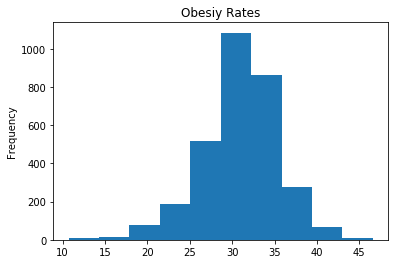

In [24]:
merged_df["obesity_rate"].plot.hist(title = "Obesiy Rates")

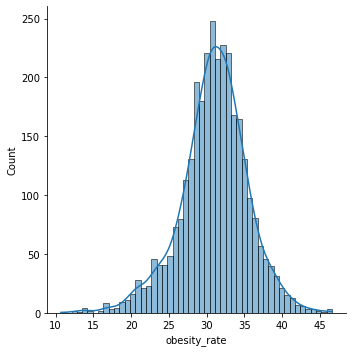

In [31]:
sns.displot(data = merged_df, x = 'obesity_rate', kde = True)

<AxesSubplot:xlabel='median_household_income', ylabel='obesity_rate'>

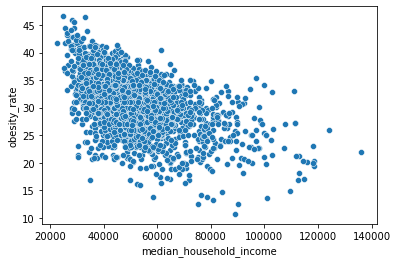

In [36]:
sns.scatterplot(data=merged_df, x="median_household_income", y="obesity_rate")

Text(0.5, 1.0, 'region vs. obesity_rate')

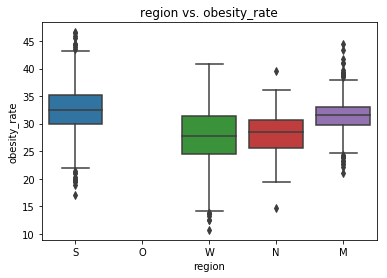

In [25]:
sns.boxplot(x = "region", y='obesity_rate', data = merged_df)
plt.title("region vs. obesity_rate")

In [26]:
obesity_subset = merged_df.copy()
obesity_subset = merged_df[['obesity_category', 'percent_white', 'percent_black', 'percent_native_american', 'percent_asian', 'percent_nhpi', 'percent_multi', 'percent_nonwhite_hispanic']]
obesity_subset

,obesity_category,percent_white,percent_black,percent_native_american,percent_asian,percent_nhpi,percent_multi,percent_nonwhite_hispanic
0,high,75.4,19.1,0.3,0.9,0.1,0.4,2.7
1,med,83.1,9.5,0.8,0.7,0.0,0.4,4.4
2,high,45.7,48.0,0.2,0.6,0.0,0.3,4.2
3,high,74.6,22.1,0.4,0.0,0.0,0.5,2.4
4,high,87.4,1.6,0.4,0.1,0.0,0.4,9.0
5,high,21.6,75.6,1.0,0.7,0.0,1.4,0.3
6,high,52.2,44.9,0.1,1.1,0.0,0.5,0.3
7,high,72.7,20.5,0.4,1.0,0.0,0.4,3.6
8,high,56.2,39.3,0.3,1.0,0.0,0.4,2.2
9,high,91.8,5.0,0.5,0.2,0.0,0.3,1.6


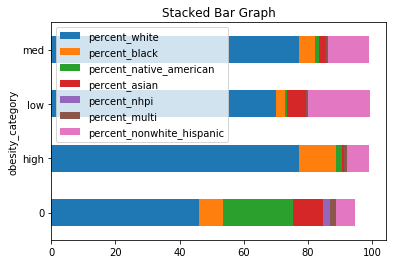

In [27]:
obesity_avg = obesity_subset.groupby('obesity_category').mean()
obesity_avg = obesity_avg.reset_index()
obesity_avg.plot(
    x = 'obesity_category',
    kind = 'barh',
    stacked = True,
    title = 'Stacked Bar Graph',
    mark_right = True)

In [28]:
obesity_subset_nonwhite = merged_df[['obesity_category', 'percent_black', 'percent_native_american', 'percent_asian', 'percent_nhpi', 'percent_multi', 'percent_nonwhite_hispanic']]

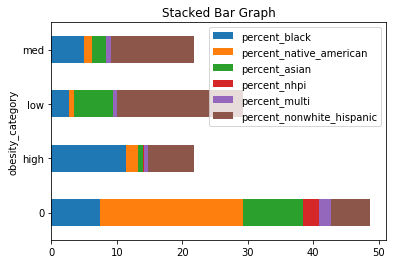

In [29]:
obesity_avg_nonwhite = obesity_subset_nonwhite.groupby('obesity_category').mean()
obesity_avg_nonwhite = obesity_avg_nonwhite.reset_index()
obesity_avg_nonwhite.plot(
    x = 'obesity_category',
    kind = 'barh',
    stacked = True,
    title = 'Stacked Bar Graph',
    mark_right = True)

In [30]:
# 41 of our counties do not have obesity rate data

merged_df[merged_df['obesity_category'] == '0']

,fips,state,county,percent_pop_low_access_15,percent_low_income_low_access_15,percent_no_car_low_access_15,percent_snap_low_access_15,percent_child_low_access_15,percent_senior_low_access_15,percent_white_low_access_15,percent_black_low_access_15,percent_hispanic_low_access_15,percent_asian_low_access_15,percent_nhna_low_access_15,nhpi_low_access_15,percent_nhpi_low_access_15,percent_multiracial_low_access_15,grocery_per1000,super_per1000,convenience_per1000,specialty_per1000,snap_available_per1000,wic_available_per1000,obesity_rate,farmers_markets_per1000,pct_fm_accepting_snap,pct_fm_accept_wic,pct_fm_credit,fm_sell_frveg,pct_fm_sell_frveg,region,fi_rate,child_fi_rate,cost_per_meal,est_annual_food_budget_shortfall,snap_bens_per1000,school_lunch_prog_17,school_bfast_prog_17,smr_food_prog_17,wic_parts_pop_17,fast_food_per1000,full_service_per1000,pop_estimate,percent_white,percent_black,percent_native_american,percent_asian,percent_nhpi,percent_multi,percent_nonwhite_hispanic,median_household_income,obesity_category,class_category,grocery_access_score,supercenter_access_score,fullservice_access_score,farmersmarket_access_score,healthy_access_score,healthy_access_category,primary_minority
67,2013,AK,Aleutians East,0.70,0.35,0.22,0.10,0.07,0.03,0.16,0.07,0.09,0.25,0.16,17.000000,0.01,0.05,1.203369,0.000000,0.000000,0.000000,1.483680,0.885478,NaN,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,O,12.5,16.3,4.09,293000.0,8.506430,40.595829,20.282884,3.757416,2.458541,0.300842,0.300842,3338,15.5,5.2,38.1,26.2,1.4,1.5,9.7,69375.0,0,mid_class,3,1,1,1,6,low,native_american
68,2016,AK,Aleutians West,0.22,0.09,0.12,0.03,0.04,0.01,0.05,0.01,0.01,0.04,0.11,7.424557,0.00,0.02,0.696015,0.000000,0.174004,0.174004,0.665163,0.526501,NaN,0.174734,0.000000,0.000000,0.000000,0.0,0.000000,O,12.3,13.1,6.09,738000.0,4.251258,40.595829,20.282884,3.757416,2.458541,0.000000,0.696015,5784,24.8,5.1,11.8,38.3,2.6,1.4,13.5,80290.0,0,mid_class,3,1,2,3,9,medium,asian
69,2020,AK,Anchorage,0.27,0.05,0.01,0.01,0.07,0.02,0.20,0.01,0.02,0.02,0.02,844.011828,0.00,0.02,0.110971,0.043716,0.171500,0.067255,0.398893,0.080749,NaN,0.034301,50.000000,60.000000,60.000000,8.0,80.000000,O,12.1,16.3,3.41,21054000.0,16.575733,40.595829,20.282884,3.757416,2.458541,0.699451,0.830598,298225,59.2,5.5,7.3,9.3,2.4,0.6,8.9,78579.0,0,mid_class,1,3,3,2,9,medium,white
70,2050,AK,Bethel,0.68,0.42,0.54,0.29,0.26,0.04,0.04,0.00,0.00,0.00,0.61,5.890231,0.00,0.02,1.279199,0.000000,0.278087,0.000000,2.853692,0.776958,NaN,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,O,21.5,29.5,3.76,2482000.0,103.595009,40.595829,20.282884,3.757416,2.458541,0.333704,0.333704,17957,10.2,0.7,82.7,0.9,0.0,0.9,2.2,45582.0,0,lower_mid_class,3,1,1,1,6,low,native_american
71,2060,AK,Bristol Bay,1.00,0.18,0.10,0.05,0.23,0.08,0.48,0.00,0.02,0.01,0.34,3.000000,0.00,0.17,2.209945,0.000000,0.000000,0.000000,2.306805,2.214839,NaN,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,O,12.2,17.1,3.52,66000.0,19.896194,40.595829,20.282884,3.757416,2.458541,0.000000,2.209945,917,50.3,0.4,34.6,1.4,0.3,2.4,4.5,70094.0,0,mid_class,3,1,3,1,8,medium,white
72,2068,AK,Denali,1.00,0.23,0.00,0.03,0.23,0.08,0.90,0.01,0.02,0.01,0.04,1.000000,0.00,0.05,0.488998,0.000000,1.466993,0.000000,0.040180,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,O,14.5,17.4,3.52,198000.0,11.812922,40.595829,20.282884,3.757416,2.458541,1.466993,2.933985,2303,82.7,0.2,2.2,4.7,0.0,4.5,0.7,73220.0,0,mid_class,3,1,3,1,8,medium,white
73,2070,AK,Dillingham,0.51,0.32,0.35,0.19,0.18,0.04,0.03,0.00,0.01,0.00,0.44,2.000000,0.00,0.04,0.803859,0.000000,0.200965,0.000000,1.622060,0.603622,NaN,0.200000,0.000000,0.000000,0.000000,0.0,0.000000,O,16.5,23.3,3.77,527000.0,68.447556,40.595829,20.282884,3.757416,2.458541,0.200965,0.401929,4974,16.2,0.4,72.9,1.5,0.0,1.7,3.1,52641.0,0,lower_mid_class,3,1,1,3,8,medium,native_american
74,2090,AK,Fairbanks North Star,0.34,0.07,0.02,0.02,0.09,0.02,0.27,0.02,0.02,0.01,0.02,142.565431,0.00,0.03,0.069581,0.039761,0.238564,0.0596

In [31]:
merged_df[merged_df['state'] == 'AK'].count()

fips                                 29
state                                29
county                               29
percent_pop_low_access_15            29
percent_low_income_low_access_15     29
percent_no_car_low_access_15         29
percent_snap_low_access_15           29
percent_child_low_access_15          29
percent_senior_low_access_15         29
percent_white_low_access_15          29
percent_black_low_access_15          29
percent_hispanic_low_access_15       29
percent_asian_low_access_15          29
percent_nhna_low_access_15           29
nhpi_low_access_15                   29
percent_nhpi_low_access_15           29
percent_multiracial_low_access_15    29
grocery_per1000                      29
super_per1000                        29
convenience_per1000                  29
specialty_per1000                    29
snap_available_per1000               25
wic_available_per1000                26
obesity_rate                          0
farmers_markets_per1000              28


### Looking at the healthy access score

Here we are exolporing variables as they strictly relate to the healthy accesss score

In [32]:
merged_df["healthy_access_score"].describe()

count    3150.000000
mean        7.937778
std         1.811698
min         3.000000
25%         7.000000
50%         8.000000
75%         9.000000
max        12.000000
Name: healthy_access_score, dtype: float64

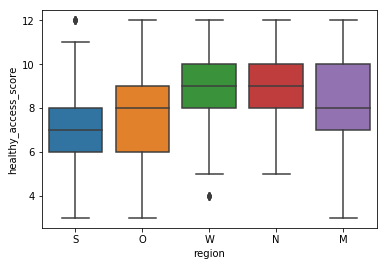

In [33]:
sns.boxplot(x = "region", y= "healthy_access_score", data = merged_df)

### Looking at income levels

Here we are exolporing variables as they strictly relate to income levels

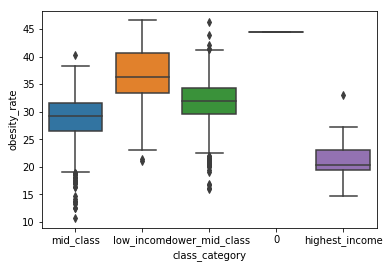

In [34]:
sns.boxplot(x = "class_category", y= "obesity_rate", data = merged_df)

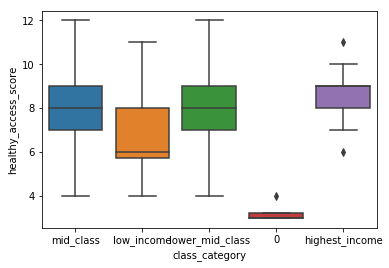

In [35]:
sns.boxplot(x = "class_category", y= "healthy_access_score", data = merged_df)

### Correlation Matrix

In [39]:
merged_df.columns
df_working = merged_df.drop(['fips', 'state', 'county', 'region', 'pop_estimate', 'obesity_category', 'class_category',
       'grocery_access_score', 'supercenter_access_score',
       'fullservice_access_score', 'farmersmarket_access_score',
       'healthy_access_score', 'healthy_access_category', 'primary_minority'], axis=1)
df_working.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3150 entries, 0 to 3149
Data columns (total 46 columns):
percent_pop_low_access_15            3131 non-null float64
percent_low_income_low_access_15     3130 non-null float64
percent_no_car_low_access_15         3147 non-null float64
percent_snap_low_access_15           3130 non-null float64
percent_child_low_access_15          3131 non-null float64
percent_senior_low_access_15         3131 non-null float64
percent_white_low_access_15          3131 non-null float64
percent_black_low_access_15          3131 non-null float64
percent_hispanic_low_access_15       3131 non-null float64
percent_asian_low_access_15          3131 non-null float64
percent_nhna_low_access_15           3131 non-null float64
nhpi_low_access_15                   3131 non-null float64
percent_nhpi_low_access_15           3131 non-null float64
percent_multiracial_low_access_15    3131 non-null float64
grocery_per1000                      3150 non-null float64
super_pe

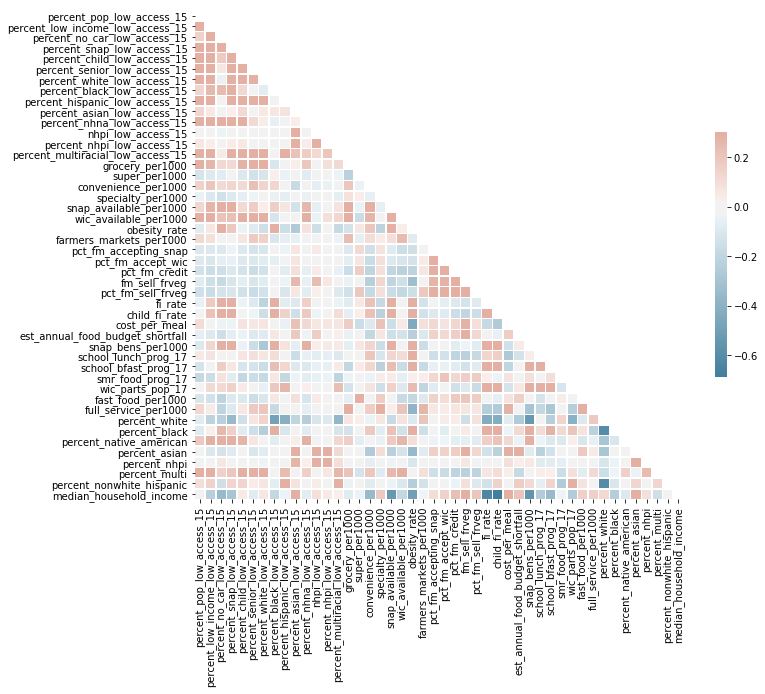

In [40]:
corr = df_working.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
merged_df

# Statistical Testing

## F-tests